# ADVANCED CONTOUR PROPERTIES
- Always consider contours before more advanced computer vision and ML methods.
- Properties
    - Aspect ratio
    - Extent
    - Convex hull
    - Solidity

## Aspect Ratio
- Actual definition of contour's aspect ratio is as follows:
  <br> *aspect ratio = image width/image height*
- Shapes with aspect ratio < 1: characters on license plate, digits
- Shapes with aspect ratio > 1: license plate

## Extent
- Ratio of contour area to the bounding box area.
- *extent = shape area/bounding box area*
- Shape area is the number of pixels inside the contoured region
- In all cases the extent will be less than 1, because the number of pixels inside the contour cannot possibly be larger than number of pixels in bounding box.

## Convex Hull
- Think of convex hull as a super elastic rubber stretched along the edges of the shape of object. This super elstic rubber band never leaves any extra space.
- Convex hull is the minimum enclosing polygon of all points of the input shape

## Solidity
- Solidity of shape is: <br>
*solidity = contour area / convex hull area*
- Not possible to have value greater than 1

In [1]:
import sys
sys.path.append("../../")

In [2]:
import cv2
from cv_imshow import display_image, create_subplot, show_image
import imutils
import numpy as np
from matplotlib import pyplot as plt

In [3]:
args = {
    "tic-tac-toe": "../../images/tictactoe.png",
    "tetris": "../../images/tetris_blocks.png"
}

### TIC-TAC-TOE

0 (Contour #1) -- solidity=0.98
X (Contour #2) -- solidity=0.60
0 (Contour #3) -- solidity=0.98
X (Contour #4) -- solidity=0.60
X (Contour #5) -- solidity=0.60
0 (Contour #6) -- solidity=0.98


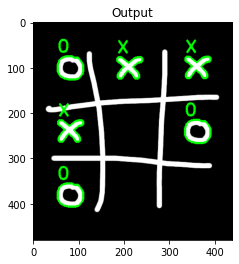

In [4]:
image = cv2.imread(args["tic-tac-toe"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for (i,c) in enumerate(cnts):
    # find area of contour
    area = cv2.contourArea(c)
    
    # find convex hull, hull area and solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area/float(hullArea)
    
    # use solidity and a priori  knowledge to determine character 
    char = "?"
    if solidity > 0.9:
        char = "0"
    elif solidity > 0.5:
        char = "X"
    
    # get bouding rectangle, to display character in image.
    (x,y,w,h) = cv2.boundingRect(c)
    if char!="?":
        cv2.drawContours(image, [c], -1, (0,255,0), 3)
        cv2.putText(image, char, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
                   (0,255,0), 4)
        print("{} (Contour #{}) -- solidity={:.2f}".format(char, i+1, solidity))
display_image("Output", image)

## IDENTIFYING TETRIS BLOCKS
- Using aspect ratio, extent, convex hull solidity
- Use threshold to creata binary image, since need this to extract contours of the image.

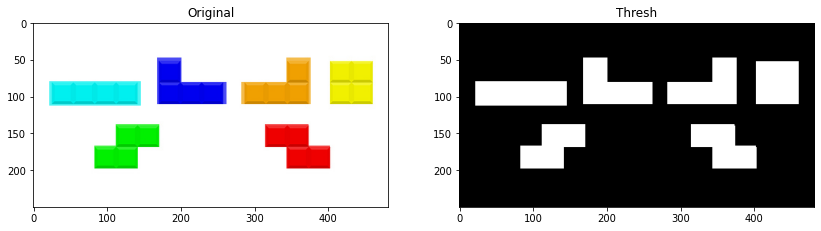

In [5]:
image = cv2.imread(args["tetris"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

fig = plt.figure(figsize=(14,14))
rows = 1
columns = 2

create_subplot(fig, rows, columns, 1, "Original", image)
create_subplot(fig, rows, columns, 2, "Thresh", thresh)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


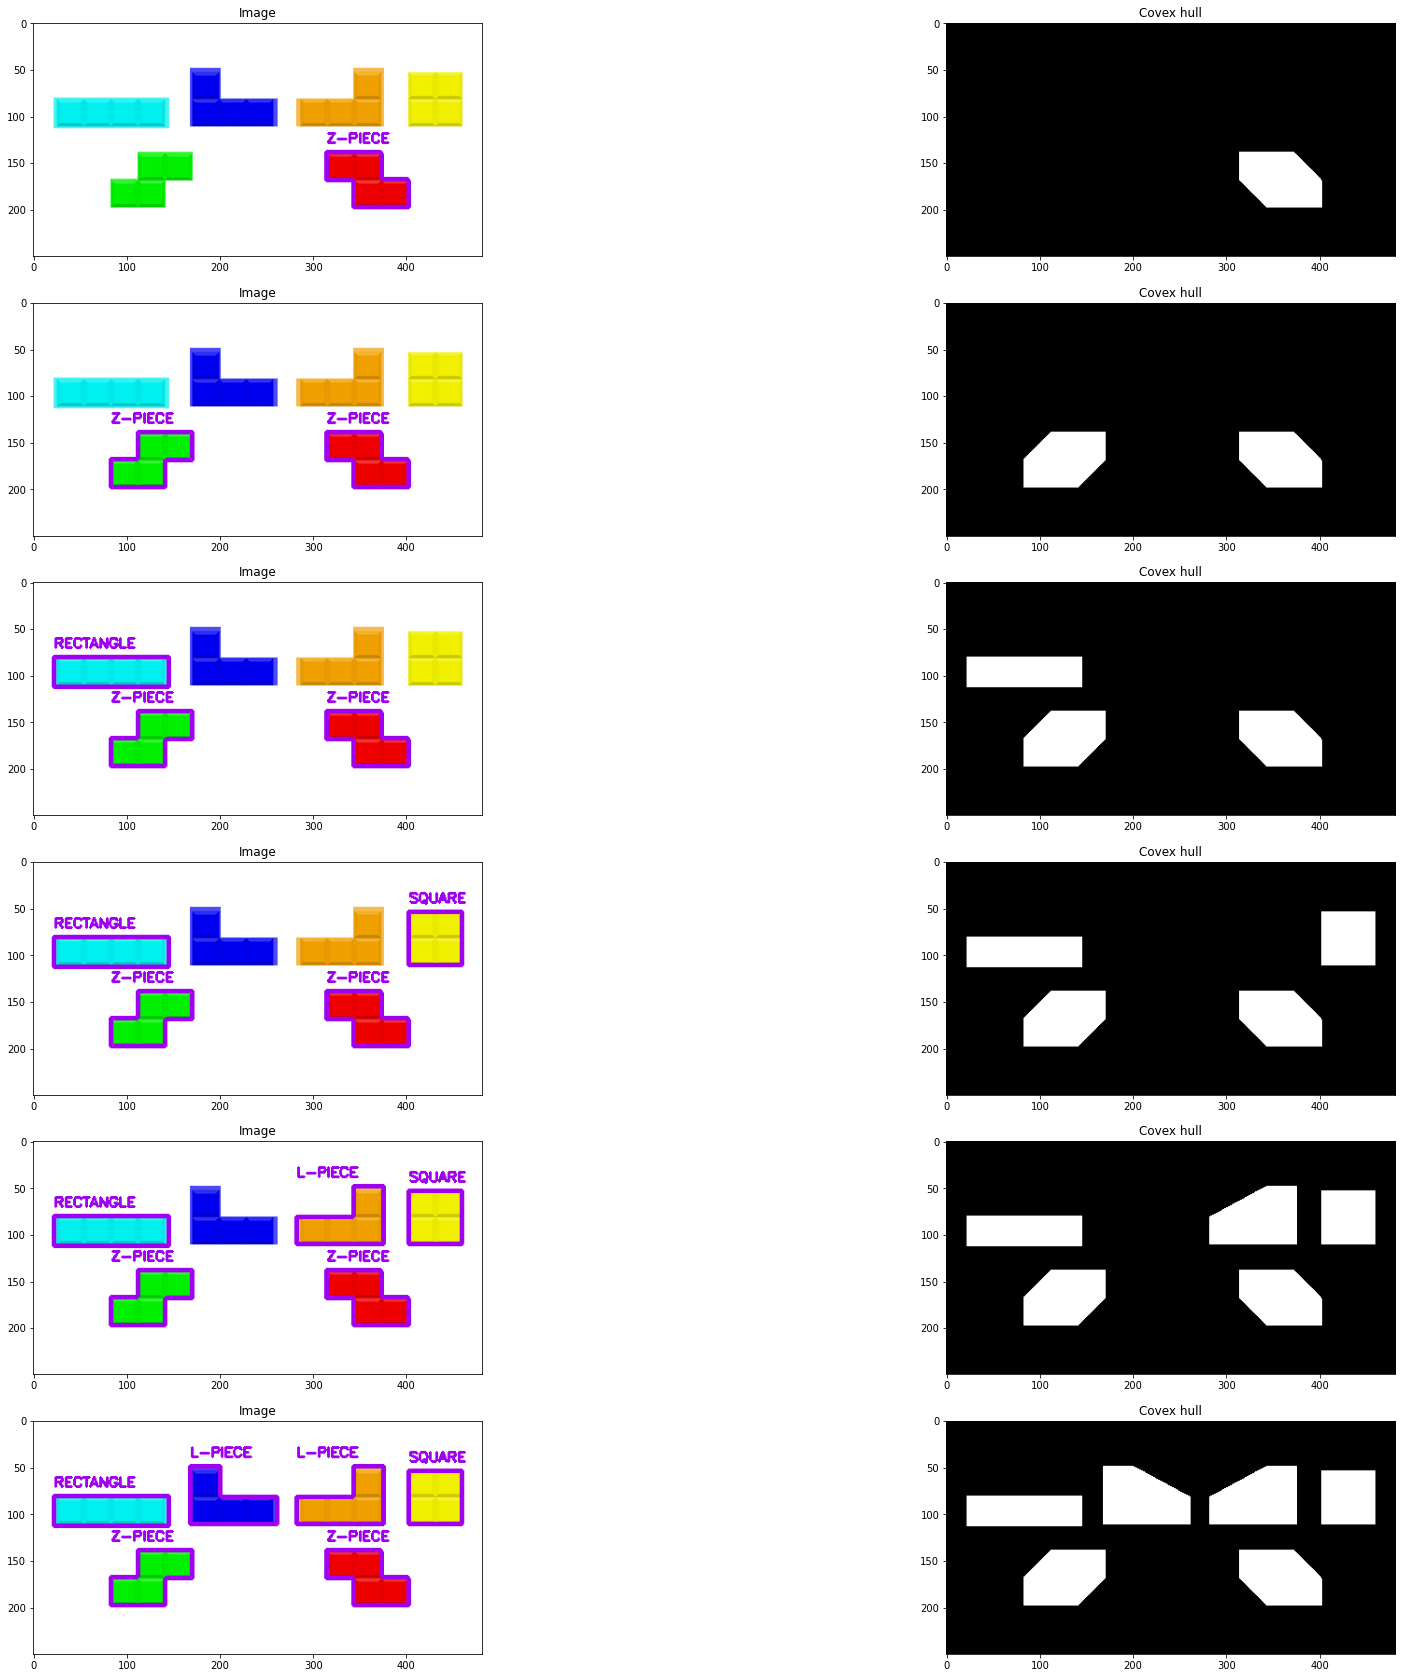

In [6]:
fig = plt.figure(figsize=(30,30))
rows = 6
columns = 2
for (i,c) in enumerate(cnts):
    area = cv2.contourArea(c)
    (x,y,w,h) = cv2.boundingRect(c)
    
    aspectRatio = w/float(h)
    extent = area/float(w*h)
    
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area/float(hullArea)
    
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240,0,159),3)
    shape = ""
    
    #if the aspect ratio is appx 1, then shape is square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"
        
    #if aspect ratio is > 3, shape is rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"
    
    #if extent is sufficiently small, we have L-piece
    elif extent < 0.65:
        shape = "L-PIECE"
    
    #if the solidity is large enough, thenn we have Z piece
    elif solidity > 0.8:
        shape = "Z-PIECE"
    
    cv2.putText(image, shape, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (240, 0, 159), 2)
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
          .format(i+1, aspectRatio, extent, solidity))
    
    create_subplot(fig, rows, columns, 2*i+1, "Image", image)
    create_subplot(fig, rows, columns, 2*i+2, "Covex hull", hullImage)